# Importing the library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


📌 Check if there are any NULL values.

In [7]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory Data Analysis (EDA)

## **Heat Map Correlation** <a id='3.1' ></a>

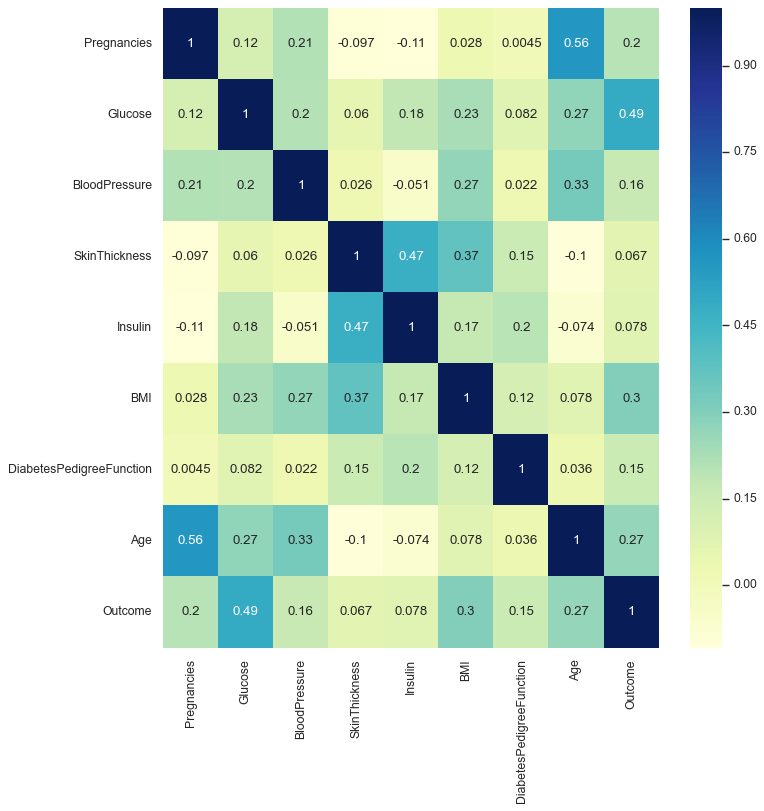

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot= True,)
plt.savefig('corr.png', bbox_inches='tight')
plt.show()

## **Pie Chart** <a id='3.2' ></a>

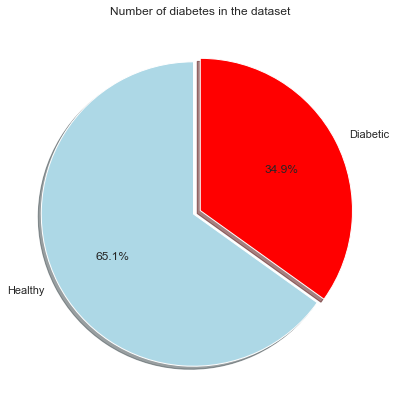

In [10]:
sns.set(style="whitegrid")
labels = ['Healthy', 'Diabetic']
sizes = dataset['Outcome'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of diabetes in the dataset')
plt.show()

📌 From above pie chart, we can say that around 65% of the people are Healthy and 35% are Diabetic 

## **Distribution Plot** <a id='3.3'></a>

### Healthy vs Diabetic by Pregnancy <a id='3.3.1'></a>

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


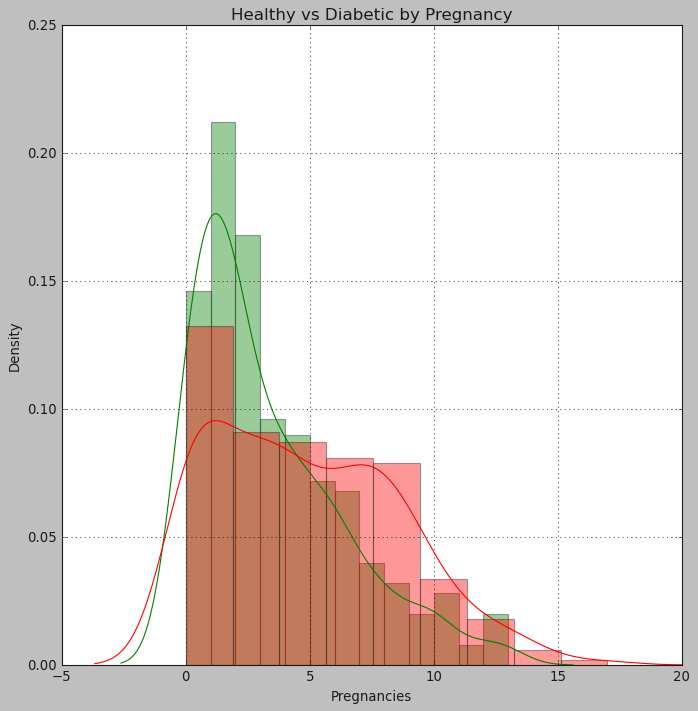

In [11]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["Pregnancies"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["Pregnancies"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Pregnancy', fontsize=15)
plt.xlim([-5,20])
plt.grid(linewidth = 0.7)
plt.show()

📌 From above graph, we can say that the Pregnancy isn't likely cause for diabetes as the distribution between the Healthy and Diabetic is almost same. 

### Healthy vs Diabetic by Glucose <a id='3.3.2'></a>

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


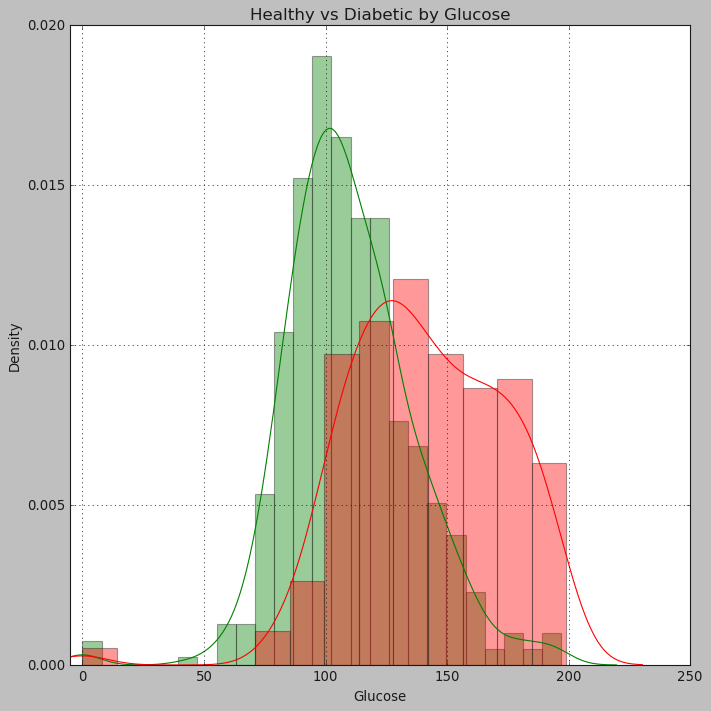

In [12]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["Glucose"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["Glucose"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Glucose', fontsize=15)
plt.xlim([-5,250])
plt.grid(linewidth = 0.7)
plt.show()

📌 Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. <br>

📌 The Glucose level for a Normal Adult is around 120-130mg/dl anything above it means that the person is likely suffering from pre-diabetes and diabetes. <br>

📌 From above graph, we can see the the Healthy person are more around 120mg/dl but it then gradually drops, and for diabetic person it is vice versa.

### Healthy vs Diabetic by Blood Pressure <a id='3.3.3'></a>

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


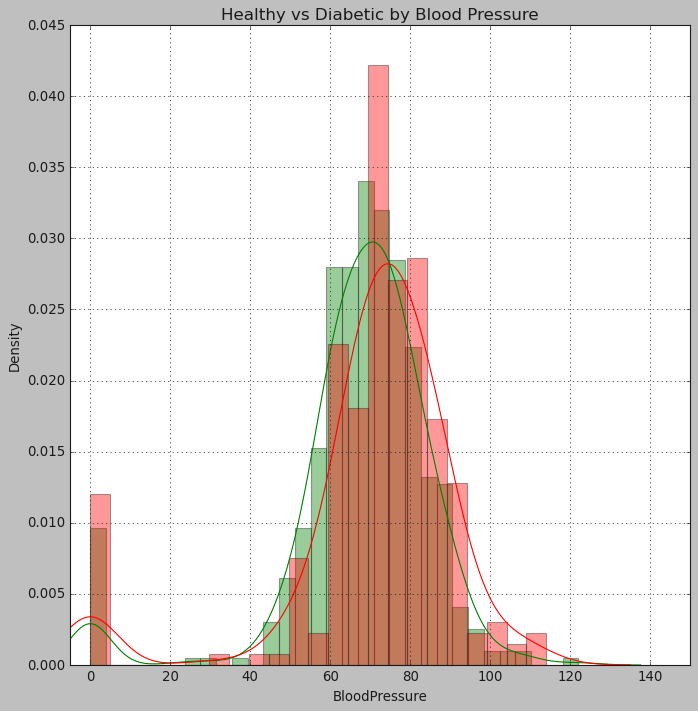

In [13]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["BloodPressure"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["BloodPressure"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Blood Pressure', fontsize=15)
plt.xlim([-5,150])
plt.grid(linewidth = 0.7)
plt.show()

📌 High blood pressure (also known as “hypertension”) is very common in people with diabetes. In fact, the two conditions often go hand-in-hand because they can both result from the same lifestyle factors. <br>

📌 Diabetes damages arteries and makes them targets for hardening, called atherosclerosis. That can cause high blood pressure, which if not treated, can lead to trouble including blood vessel damage, heart attack, and kidney failure. <br>

📌 For a Normal person BP should be at or below 120/80 mm Hg, the person with hypertension can be above 139/89 mm Hg. <br>

📌 From above graph, we can say that, diabetic and healthy people are evenly distributed with low and normal BP but, there are less healthy people who have high BP. 

### Healthy vs Diabetic by Skin Thickness <a id='3.3.4'></a>

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


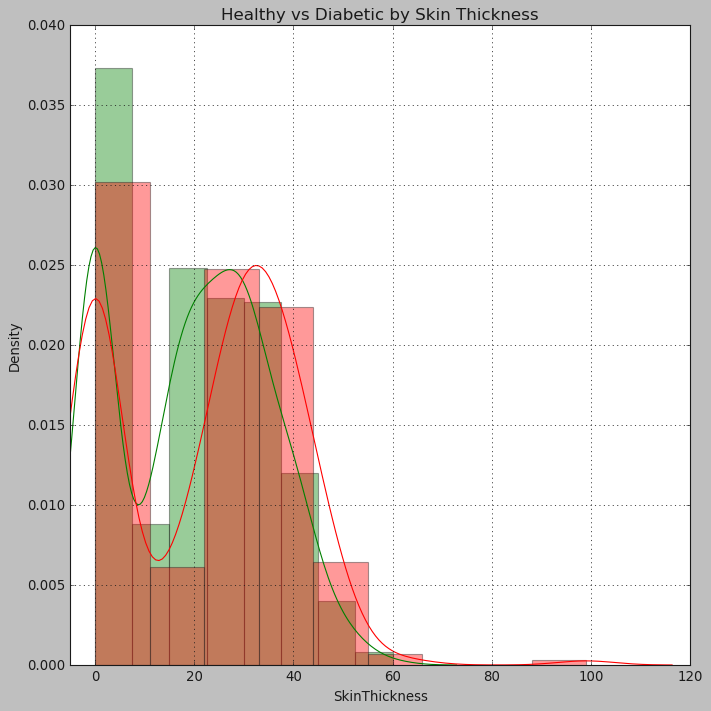

In [14]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["SkinThickness"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["SkinThickness"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Skin Thickness', fontsize=15)
plt.xlim([-5,120])
plt.grid(linewidth = 0.7)
plt.show()

📌 Changes to the blood vessels because of diabetes can cause a skin condition called diabetic dermopathy. Dermopathy appears as scaly patches that are light brown or red, often on the front of the legs. The patches do not hurt, blister, or itch, and treatment generally is not necessary. <br>

📌 From above graph, the distribution between healthy and diabetic people are around same for skin thickness.

### Healthy vs Diabetic by Insulin <a id='3.3.5'></a>

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


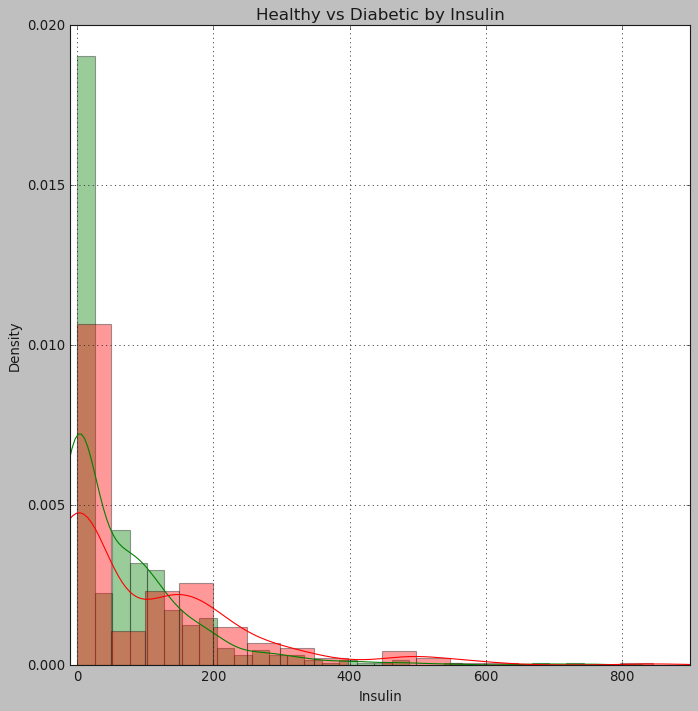

In [15]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["Insulin"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["Insulin"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Insulin', fontsize=15)
plt.xlim([-10,900])
plt.grid(linewidth = 0.7)
plt.show()

📌 Insulin is a hormone that your pancreas makes to allow cells to use glucose. When your body isn't making or using insulin correctly, you can take man-made insulin to help control your blood sugar. Many types can be used to treat diabetes. <br>

📌 Insulin helps control blood glucose levels by signaling the liver and muscle and fat cells to take in glucose from the blood. Insulin therefore helps cells to take in glucose to be used for energy. If the body has sufficient energy, insulin signals the liver to take up glucose and store it as glycogen. <br>

📌 From above graph, we can see that there are diabetic people increase as the levels of insulin gradually increases. There are more healthy people around insulin levels 0-100.

### Healthy vs Diabetic by BMI <a id='3.3.6'></a>

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


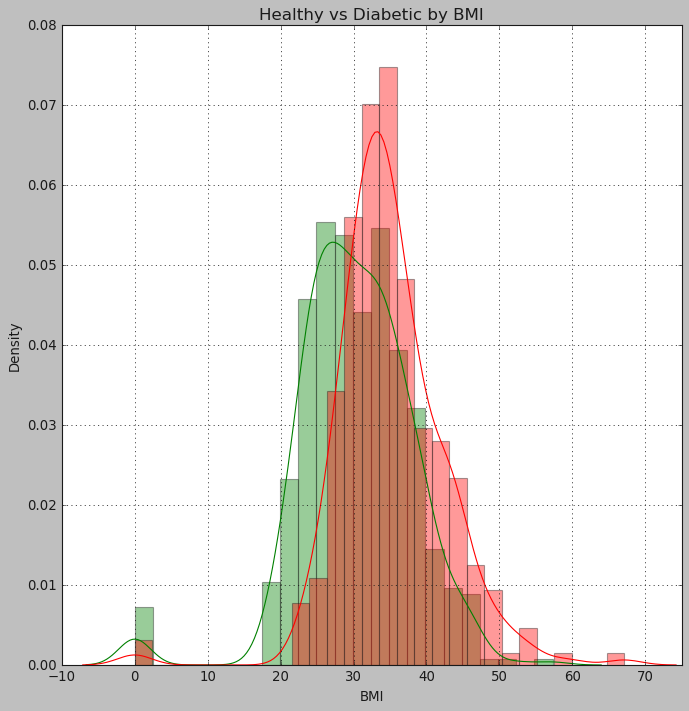

In [16]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["BMI"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["BMI"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by BMI', fontsize=15)
plt.xlim([-10,75])
plt.grid(linewidth = 0.7)
plt.show()

📌 Being overweight (BMI of 25-29.9), or affected by obesity (BMI of 30-39.9) or morbid obesity (BMI of 40 or greater), greatly increases your risk of developing type 2 diabetes. The more excess weight you have, the more resistant your muscle and tissue cells become to your own insulin hormone. <br>

📌 From above graph we can determine that, as the BMI increases the person likely being healthy decreases and being diabetic increases. 

### Healthy vs Diabetic by Diabetes Pedigree Function <a id='3.3.7'></a>

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


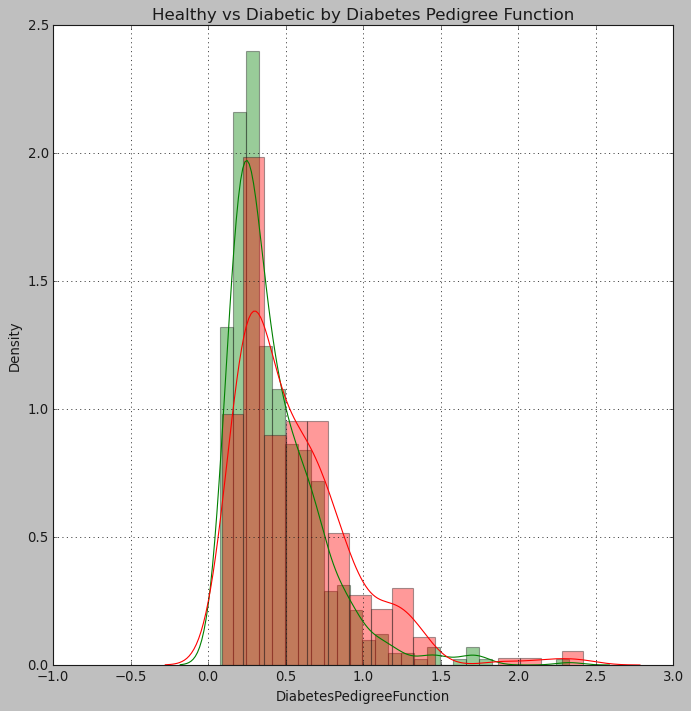

In [17]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["DiabetesPedigreeFunction"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["DiabetesPedigreeFunction"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Diabetes Pedigree Function', fontsize=15)
plt.xlim([-1,3])
plt.grid(linewidth = 0.7)
plt.show()

📌 Diabetes Pedigree Function is a function which scores likelihood of diabetes based on family history. It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. <br>

📌 From above graph, as thefunction increase the diabetic people increases, showing that the diabetes could be hereditary for that individual.

### Healthy vs Diabetic by Age <a id='3.3.8'></a>

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


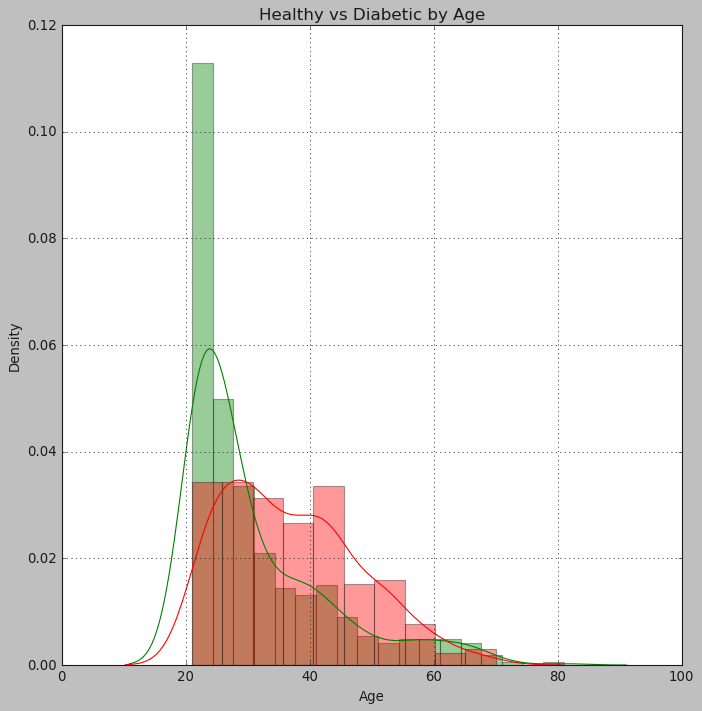

In [18]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(dataset[dataset['Outcome'] == 0]["Age"], color='green') # Healthy - green
sns.distplot(dataset[dataset['Outcome'] == 1]["Age"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Age', fontsize=15)
plt.xlim([0,100])
plt.grid(linewidth = 0.7)
plt.show()

📌 As the person ages, they are at high risk for the development of type 2 diabetes due to the combined effects of increasing insulin resistance and impaired pancreatic islet function with aging. <br>

📌 From above graph, we can see that there are more healthy people around 20-25 age but as the age gradually increases so does the people being diabetic, this shows that age and diabetes go hand in hand.

## **Outliers - Detecting and Removing** <a id='3.4'></a>

📌 An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. <br>

📌 In this notebook, we are using ***Box Plot*** to detect the outliers of each features in our dataset, where any point above or below the whiskers represent an outlier. This is also known as “***Univariate method***” as here we are using one variable outlier analysis. <br>

📌 It is represented by the formula ***IQR = Q3 − Q1***. The lines of code below calculate and print the interquartile range for each of the variables in the dataset. The above output prints the IQR scores, which can be used to detect outliers. <br>

📌 After detecting, we are using ***Median Imputation*** to take care of outliers. In this technique, we replace the extreme values with median values. It is advised to not use mean values as they are affected by outliers. 

### Pregnancy <a id='3.4.1'></a>

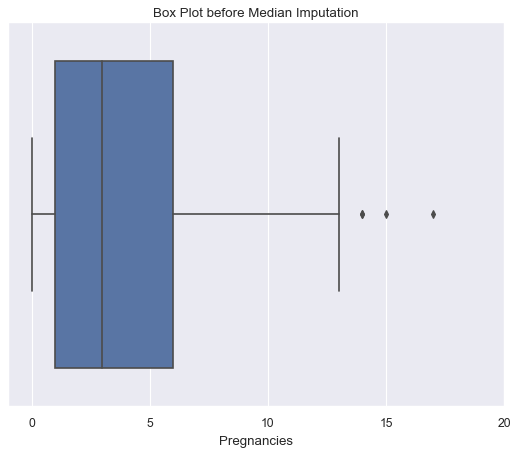

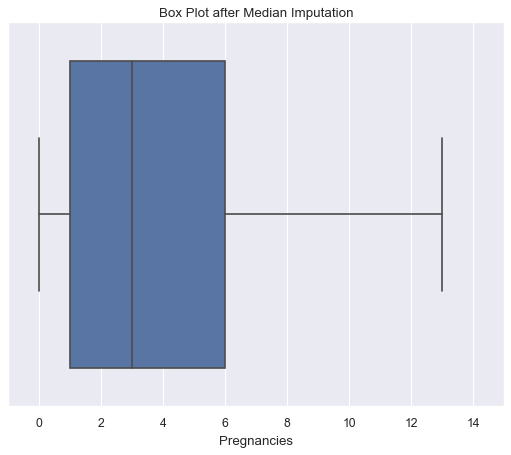

In [19]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.Pregnancies)
plt.xlim([-1,20])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.Pregnancies.quantile(0.25)
q3 = dataset.Pregnancies.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.Pregnancies)
for i in dataset.Pregnancies:
    if i > Upper_tail or i < Lower_tail:
            dataset.Pregnancies = dataset.Pregnancies.replace(i, med)
sns.boxplot(x= dataset.Pregnancies)
plt.xlim([-1,15])
plt.title("Box Plot after Median Imputation")
plt.show()   

### Glucose <a id='3.4.2'></a>

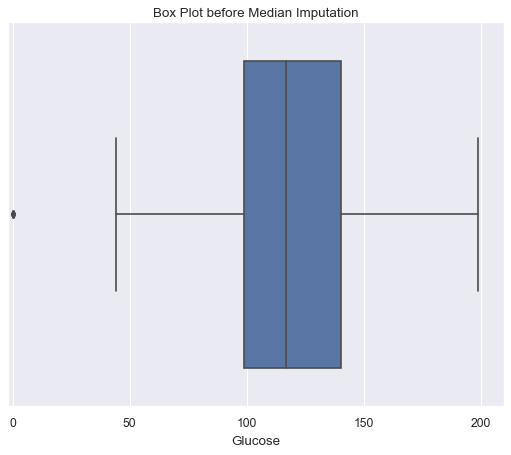

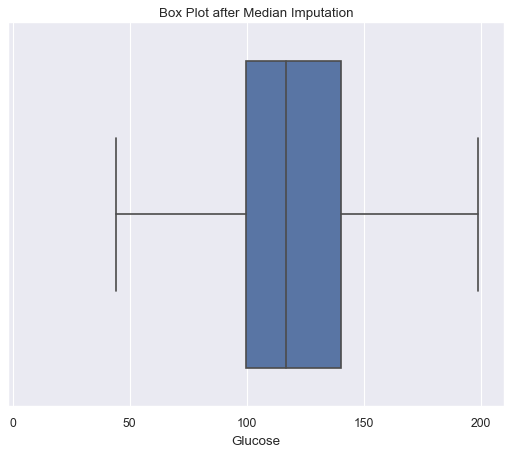

In [20]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.Glucose)
plt.xlim([-2,210])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.Glucose.quantile(0.25)
q3 = dataset.Glucose.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.Glucose)
for i in dataset.Glucose:
    if i > Upper_tail or i < Lower_tail:
            dataset.Glucose = dataset.Glucose.replace(i, med)
sns.boxplot(x= dataset.Glucose)
plt.xlim([-2,210])
plt.title("Box Plot after Median Imputation")
plt.show()   

### Blood Pressure <a id='3.4.3'></a>

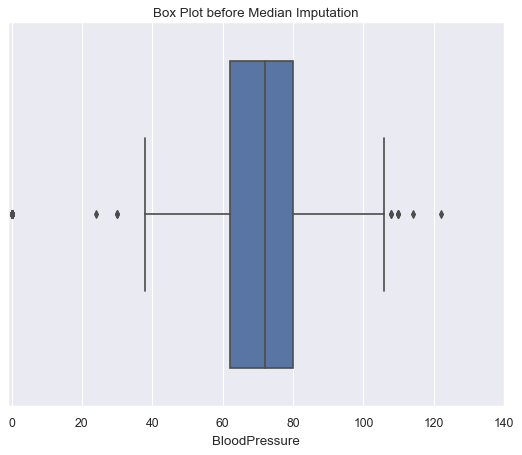

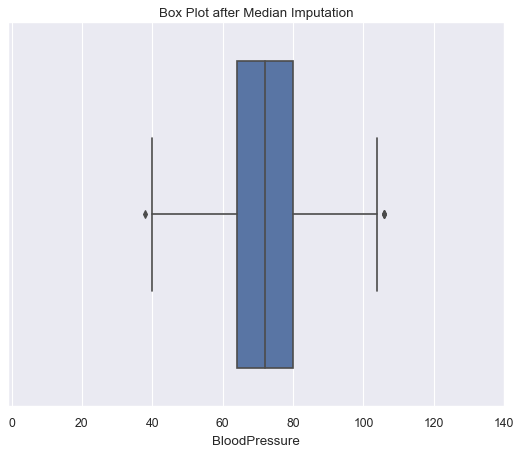

In [21]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.BloodPressure)
plt.xlim([-1,140])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.BloodPressure.quantile(0.25)
q3 = dataset.BloodPressure.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.BloodPressure)
for i in dataset.BloodPressure:
    if i > Upper_tail or i < Lower_tail:
            dataset.BloodPressure = dataset.BloodPressure.replace(i, med)
sns.boxplot(x= dataset.BloodPressure)
plt.xlim([-1,140])
plt.title("Box Plot after Median Imputation")
plt.show()   

### Skin Thickness <a id='3.4.4'></a>

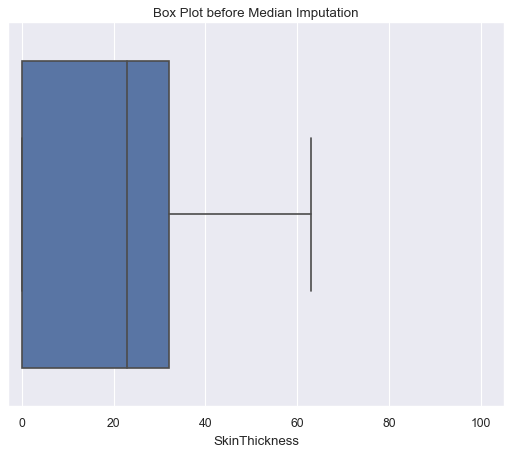

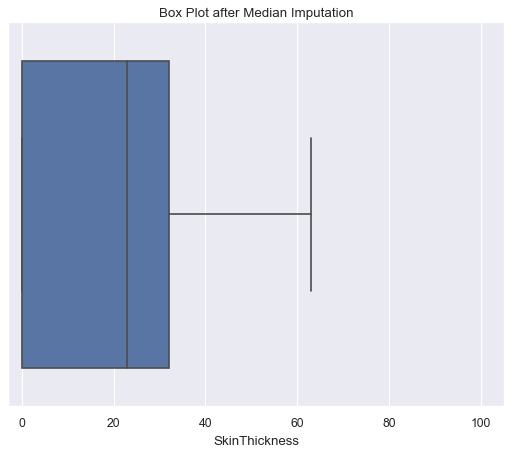

In [23]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.SkinThickness)
plt.xlim([-3,105])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.SkinThickness.quantile(0.25)
q3 = dataset.SkinThickness.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.SkinThickness)
for i in dataset.SkinThickness:
    if i > Upper_tail or i < Lower_tail:
            dataset.SkinThickness = dataset.SkinThickness.replace(i, med)
sns.boxplot(x= dataset.SkinThickness)
plt.xlim([-3,105])
plt.title("Box Plot after Median Imputation")
plt.show()   

### Insulin <a id='3.4.5'></a>

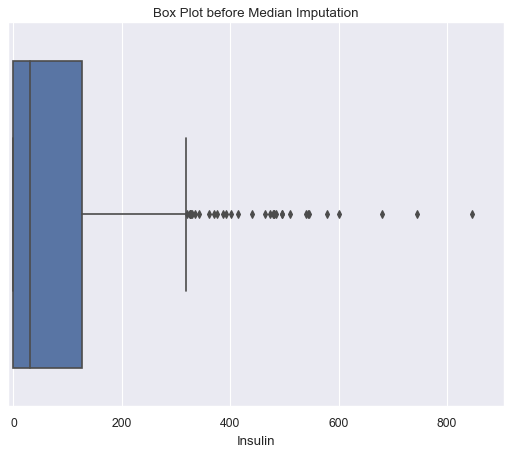

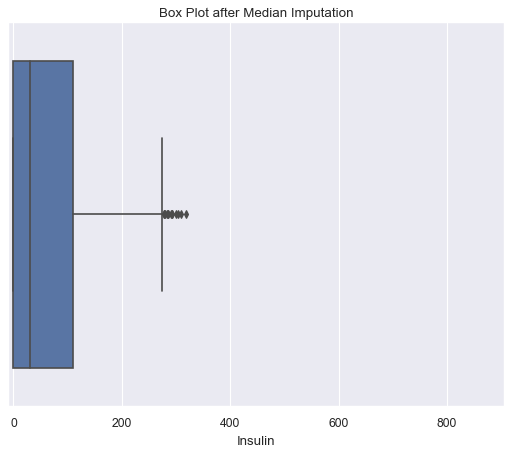

In [24]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.Insulin)
plt.xlim([-10,905])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.Insulin.quantile(0.25)
q3 = dataset.Insulin.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.Insulin)
for i in dataset.Insulin:
    if i > Upper_tail or i < Lower_tail:
            dataset.Insulin = dataset.Insulin.replace(i, med)
sns.boxplot(x= dataset.Insulin)
plt.xlim([-10,905])
plt.title("Box Plot after Median Imputation")
plt.show()   

### BMI <a id='3.4.6'></a>

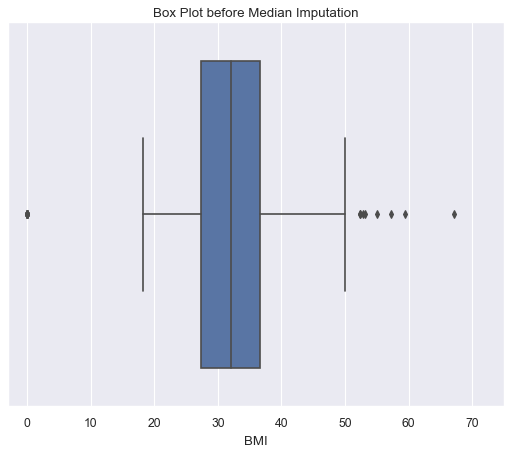

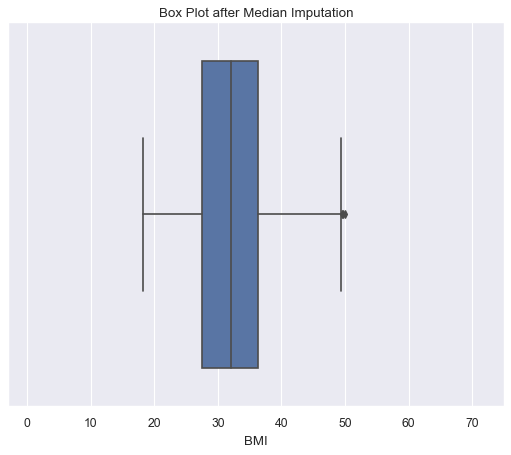

In [25]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.BMI)
plt.xlim([-3,75])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.BMI.quantile(0.25)
q3 = dataset.BMI.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.BMI)
for i in dataset.BMI:
    if i > Upper_tail or i < Lower_tail:
            dataset.BMI = dataset.BMI.replace(i, med)
sns.boxplot(x= dataset.BMI)
plt.xlim([-3,75])
plt.title("Box Plot after Median Imputation")
plt.show()   

### Diabetes Pedigree Function <a id='3.4.7'></a>

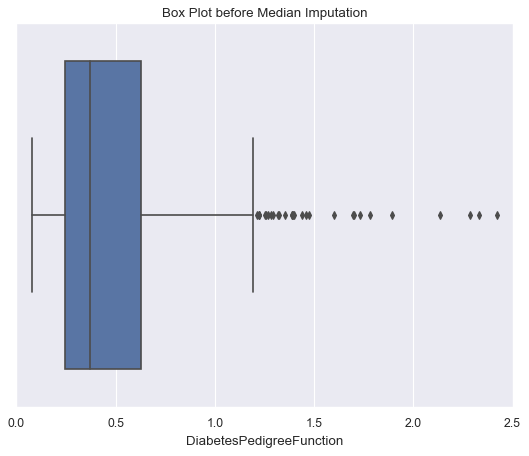

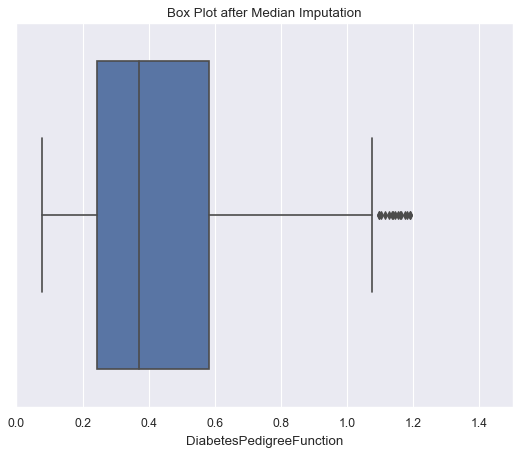

In [26]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.DiabetesPedigreeFunction)
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.DiabetesPedigreeFunction.quantile(0.25)
q3 = dataset.DiabetesPedigreeFunction.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.DiabetesPedigreeFunction)
for i in dataset.DiabetesPedigreeFunction:
    if i > Upper_tail or i < Lower_tail:
            dataset.DiabetesPedigreeFunction = dataset.DiabetesPedigreeFunction.replace(i, med)
sns.boxplot(x= dataset.DiabetesPedigreeFunction)
plt.xlim([0,1.5])
plt.title("Box Plot after Median Imputation")
plt.show()   

### Age <a id='3.4.8'></a>

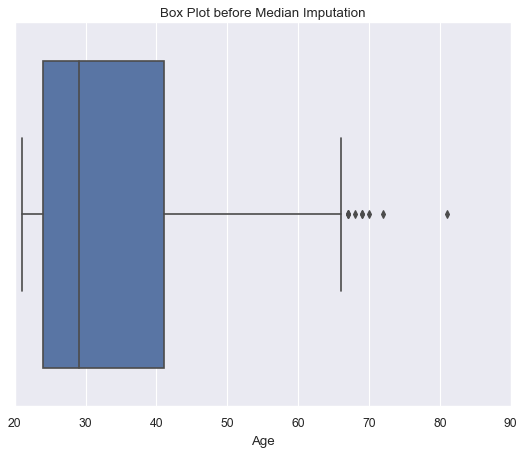

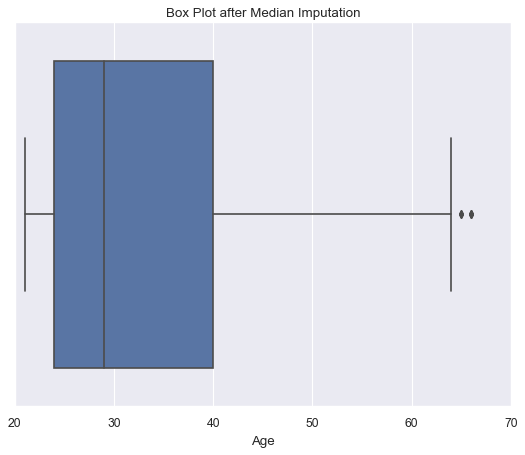

In [27]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= dataset.Age)
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = dataset.Age.quantile(0.25)
q3 = dataset.Age.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(dataset.Age)
for i in dataset.Age:
    if i > Upper_tail or i < Lower_tail:
            dataset.Age = dataset.Age.replace(i, med)
sns.boxplot(x= dataset.Age)
plt.title("Box Plot after Median Imputation")
plt.show()   

📌 From above all the graphs, I took care of all the outliers present in the dataset. 

### **Pair Plot** <a id='3.5'></a>

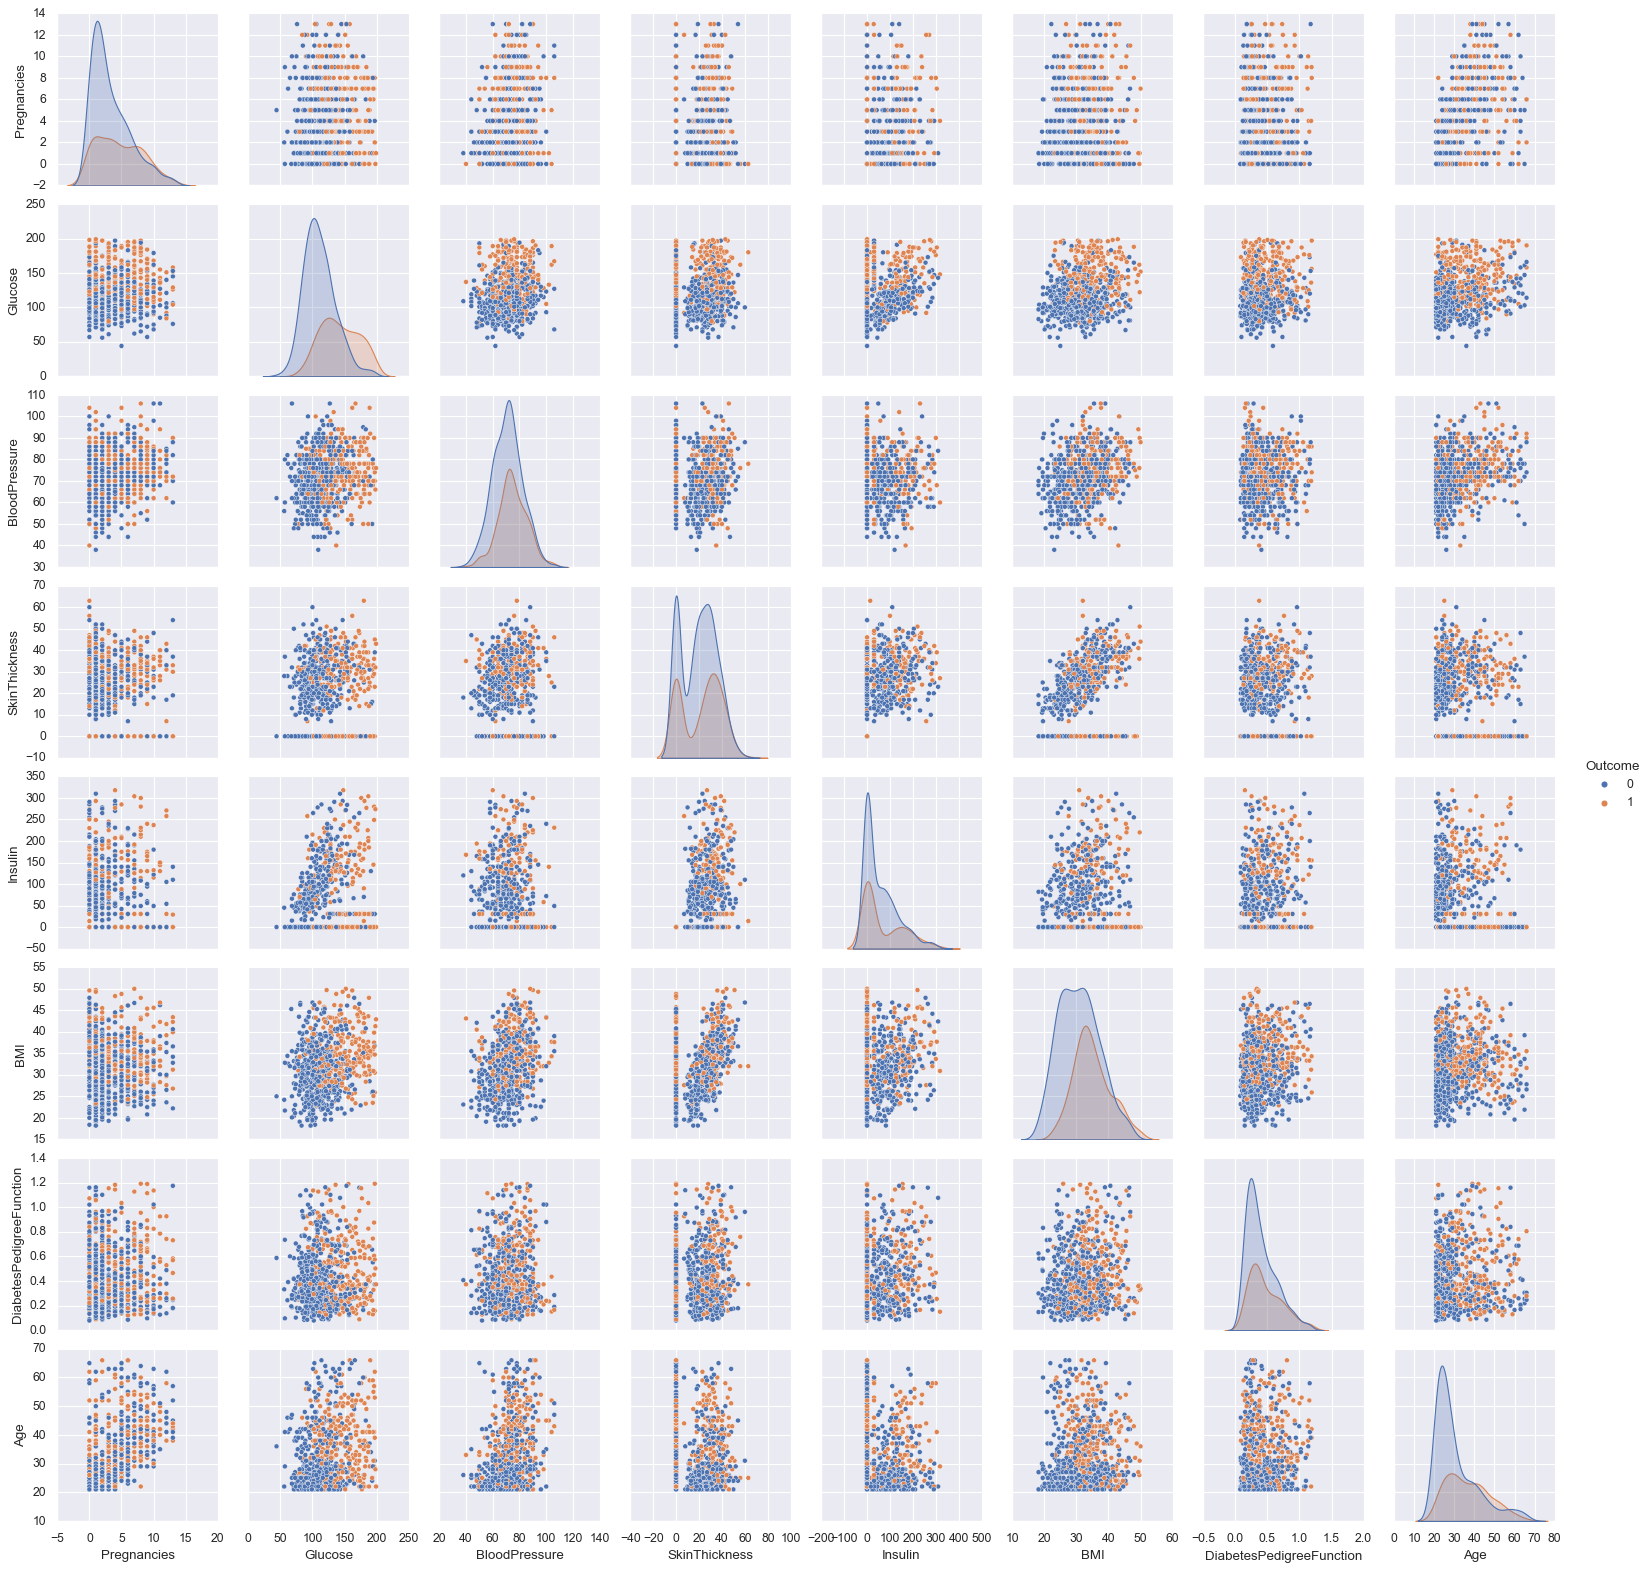

In [28]:
sns.pairplot(data=dataset,hue='Outcome',diag_kind='kde')
plt.show()

📌 From the above graphs, we can see that the outliers in our dataset have been taken care of. 

Data Preprocessing

In [29]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [30]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [31]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

## Splitting Data into Train and Test Set

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [33]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (614, 8)
Number transactions y_train dataset:  (614,)
Number transactions x_test dataset:  (154, 8)
Number transactions y_test dataset:  (154,)


## Feature Scaling 

📌 StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler results in a distribution with a standard deviation equal to 1.

In [34]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [35]:
import pickle
pickle_out = open("StandardScalar.pkl", "wb")
pickle.dump(sc, pickle_out)
pickle_out.close()

## Model Selection

📌 We are using different classification models to determine Accuracy, K-Fold Validation, ROC AUC, Precision, Recall and F1 score.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [38]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['Extra Tree', ExtraTreesClassifier(random_state=0)])
models.append(['AdaBoost', AdaBoostClassifier(random_state=0)])
models.append(['Gradiesnt Boost', GradientBoostingClassifier(random_state=0)])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[94 13]
 [21 26]]
Accuracy Score:  0.7792207792207793

K-Fold Validation Mean Accuracy: 76.54 %

Standard Deviation: 4.87 %

ROC AUC Score: 0.72

Precision: 0.67

Recall: 0.55

F1: 0.60
-----------------------------------

SVM :
[[97 10]
 [19 28]]
Accuracy Score:  0.8116883116883117

K-Fold Validation Mean Accuracy: 74.60 %

Standard Deviation: 5.57 %

ROC AUC Score: 0.75

Precision: 0.74

Recall: 0.60

F1: 0.66
-----------------------------------

KNeighbors :
[[89 18]
 [21 26]]
Accuracy Score:  0.7467532467532467

K-Fold Validation Mean Accuracy: 72.97 %

Standard Deviation: 4.27 %

ROC AUC Score: 0.69

Precision: 0.59

Recall: 0.55

F1: 0.57
-----------------------------------

GaussianNB :
[[88 19]
 [18 29]]
Accuracy Score:  0.7597402597402597

K-Fold Validation Mean Accuracy: 74.92 %

Standard Deviation: 5.44 %

ROC AUC Score: 0.72

Precision: 0.60

Recall: 0.62

F1: 0.61
-----------------------------------

BernoulliNB :
[[88 19]
 [23 24]]
Accuracy Score:  

In [39]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [40]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [41]:
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
6,Random Forest,82.467532,74.592808,6.490523,0.784351,0.727273,0.680851,0.703297
1,SVM,81.168831,74.600740,5.567546,0.751143,0.736842,0.595745,0.658824
7,Extra Tree,79.870130,75.095188,5.399328,0.747763,0.690476,0.617021,0.651685
9,Gradiesnt Boost,78.571429,74.923321,7.219247,0.744383,0.652174,0.638298,0.645161
0,Logistic Regreesion,77.922078,76.541512,4.874479,0.715848,0.666667,0.553191,0.604651
3,GaussianNB,75.974026,74.918033,5.437440,0.719726,0.604167,0.617021,0.610526
8,AdaBoost,74.675325,73.289265,4.644792,0.716345,0.576923,0.638298,0.606061
2,KNeighbors,74.675325,72.969328,4.265670,0.692484,0.590909,0.553191,0.571429
4,BernoulliNB,72.727273,72.305658,4.447508,0.666534,0.558140,0.510638,0.533333
5,Decision Tree,70.779221,69.531994,5.242639,0.676377,0.518519,0.595745,0.554455


📌 From above we can determine, RandomForest seems to have high accuracy but the standard deviation is high and its ROC AUC score also is high. <br>

📌 But, we will also tune the model with Grid Search to determine best parameters for different models and to also increase its overall scores. 

## Tuning the Models 

In [42]:
from sklearn.model_selection import GridSearchCV

📌 The ***GridSearchCV*** is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

In [43]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (ExtraTreesClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (AdaBoostClassifier(),[{'n_estimators':[100,150,200],'learning_rate':[0.1, 0.5, 0.8, 1],'algorithm':['SAMME', 'SAMME.R'], 'random_state':[0]}]),
               (GradientBoostingClassifier(),[{'n_estimators':[100,150,200],'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}])]

In [44]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 76.54%
Best Parameters :  {'C': 1, 'random_state': 0}

----------------

KNeighborsClassifier():
Best Accuracy : 73.79%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 8}

----------------

SVC():
Best Accuracy : 76.54%
Best Parameters :  {'C': 0.5, 'kernel': 'linear', 'random_state': 0}

----------------

GaussianNB():
Best Accuracy : 74.92%
Best Parameters :  {'var_smoothing': 1e-09}

----------------

BernoulliNB():
Best Accuracy : 72.31%
Best Parameters :  {'alpha': 0.25}

----------------

DecisionTreeClassifier():
Best Accuracy : 69.53%
Best Parameters :  {'criterion': 'gini', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 75.10%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 0}

----------------

ExtraTreesClassifier():
Best Accuracy : 75.10%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 100, 'random_state': 0}

----------------

AdaBoostClassifier():
Bes

## Models after Tuning Hyperparameters 

📌 After Grid Search, we got best parameters for all the models. Now, we going to tune hyperparameters see how to it perform. <br>

📌 ***True Positives (TP)*** - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. <br>

📌 ***True Negatives (TN)*** - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. <br>

📌 ***False Positives (FP)*** – When actual class is no and predicted class is yes. <br>

📌 ***False Negatives (FN)*** – When actual class is yes but predicted class in no. <br>

📌 ***Accuracy*** - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Accuracy = TP+TN/TP+FP+FN+TN** <br>

📌 ***Precision*** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Precision = TP/TP+FP** <br>

📌 ***Recall (Sensitivity)*** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Recall = TP/TP+FN** <br>

📌 ***F1 score*** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**F1 Score = 2*(Recall * Precision) / (Recall + Precision)** <br>

📌 ***Support*** - Support is the number of actual occurrences of the class in the specified dataset. Support doesn’t change between models but instead diagnoses the evaluation process. 

## **Logistic Regression** <a id='9.1'></a>

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.67      0.55      0.60        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154

ROC AUC score: 0.8576257705309207
Accuracy Score:  0.7792207792207793


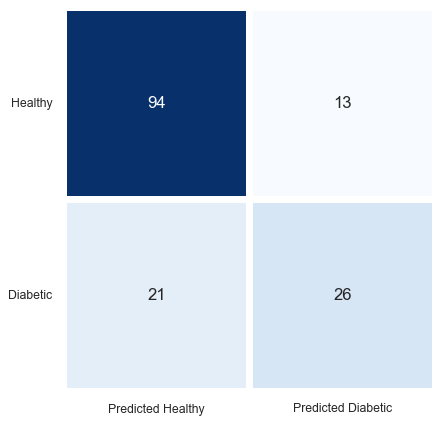

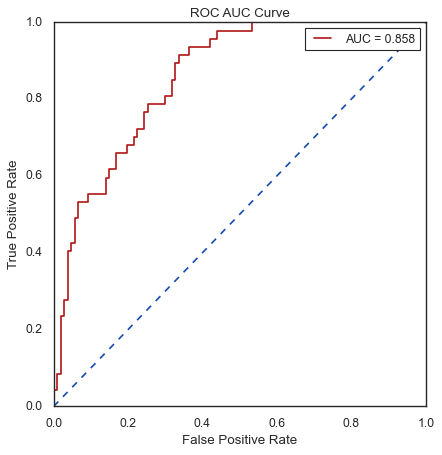

<Figure size 480x480 with 0 Axes>

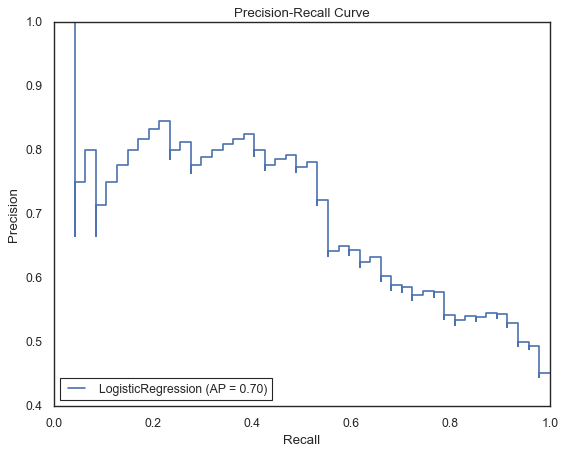

In [45]:
#Fitting Logistic Regression Model
classifier = LogisticRegression(C= 1, random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
plt.figure(figsize = (6, 6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **KNeighbors** <a id='9.2'></a>

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       107
           1       0.65      0.51      0.57        47

    accuracy                           0.77       154
   macro avg       0.73      0.69      0.71       154
weighted avg       0.76      0.77      0.76       154

ROC AUC score: 0.8075164048518593
Accuracy Score:  0.7662337662337663


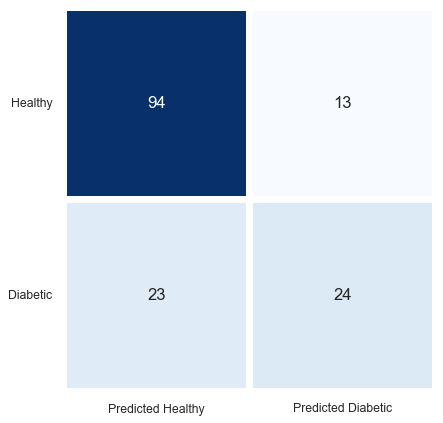

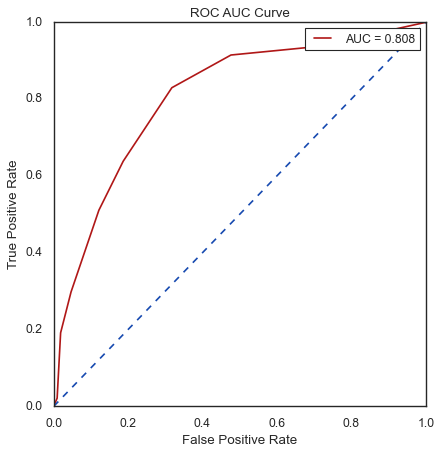

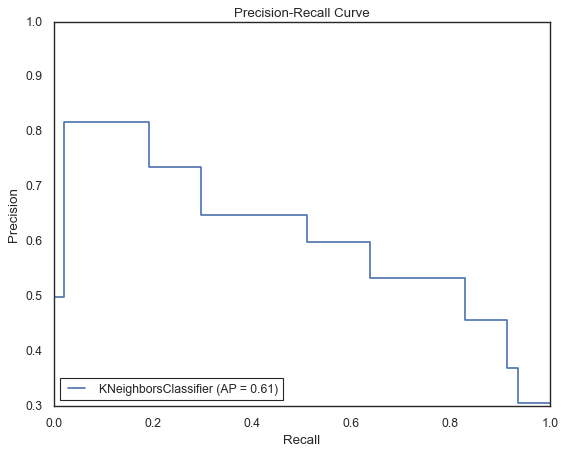

In [46]:
#Fitting KNeighborsClassifier Model
classifier = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 8)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **SVC** <a id='9.3'></a>

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.71      0.57      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154

ROC AUC score: 0.8620003976933784
Accuracy Score:  0.7987012987012987


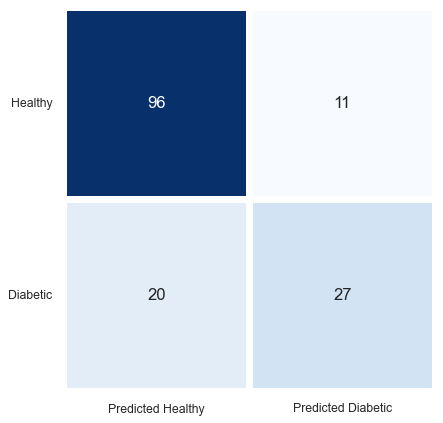

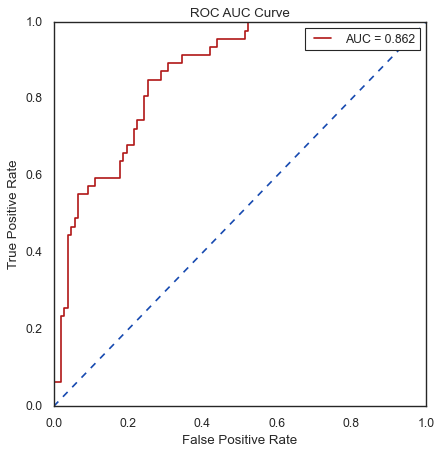

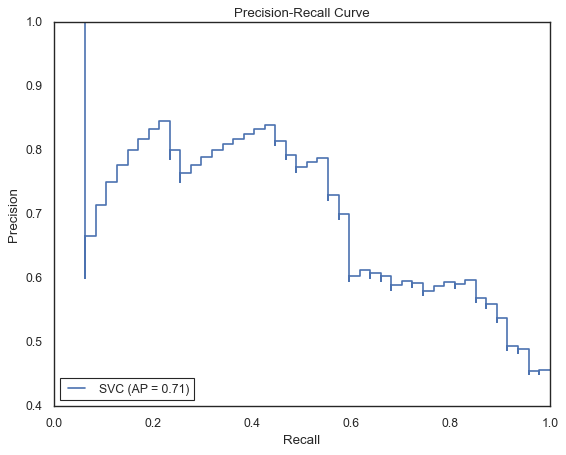

In [47]:
#Fitting SVC Model
classifier = SVC(C= 0.5, kernel= 'linear', random_state= 0, probability=True)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **GaussianNB** <a id='9.4'></a>

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       107
           1       0.60      0.62      0.61        47

    accuracy                           0.76       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.76      0.76      0.76       154

ROC AUC score: 0.8482799761383975
Accuracy Score:  0.7597402597402597


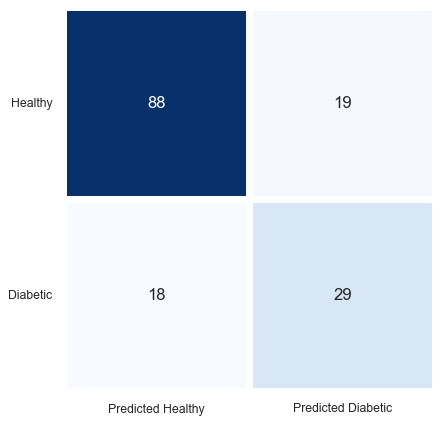

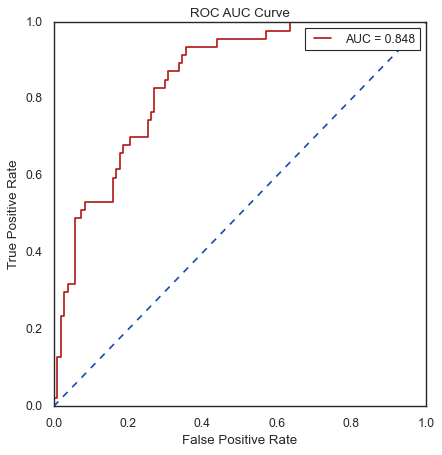

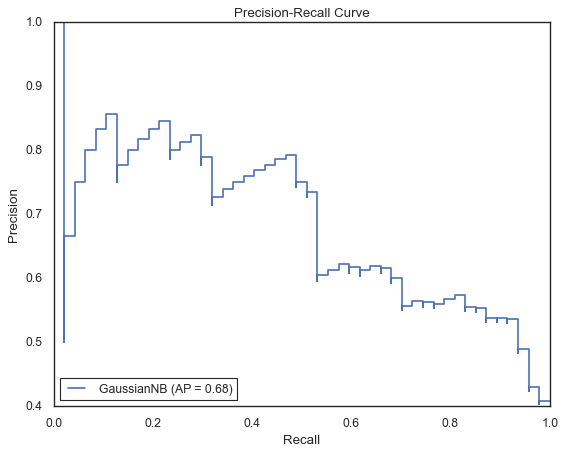

In [48]:
#Fitting GaussianNB Model
classifier = GaussianNB(var_smoothing= 1e-09)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **BernoulliNB** <a id='9.5'></a>

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       107
           1       0.56      0.51      0.53        47

    accuracy                           0.73       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.72      0.73      0.72       154

ROC AUC score: 0.7850467289719626
Accuracy Score:  0.7272727272727273


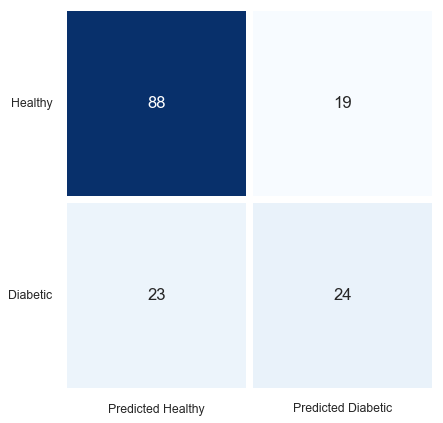

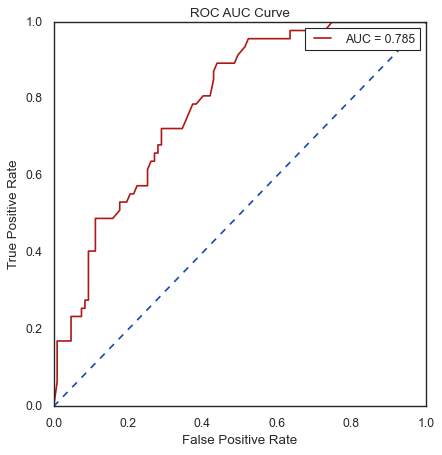

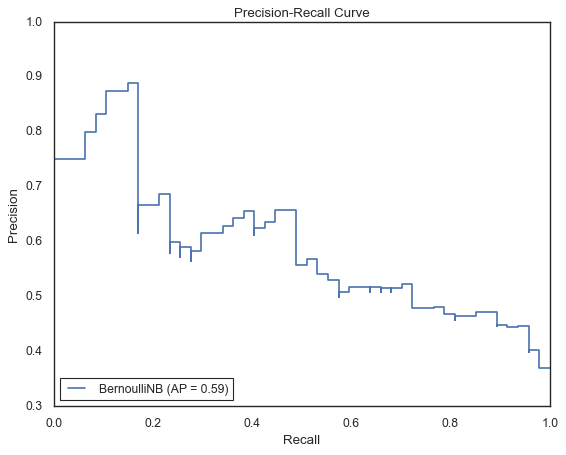

In [49]:
#Fitting BernoulliNB Model
classifier = BernoulliNB(alpha= 0.25)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **Decision Tree** <a id='9.6'></a>

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       107
           1       0.52      0.60      0.55        47

    accuracy                           0.71       154
   macro avg       0.66      0.68      0.67       154
weighted avg       0.72      0.71      0.71       154

ROC AUC score: 0.6763770133227281
Accuracy Score:  0.7077922077922078


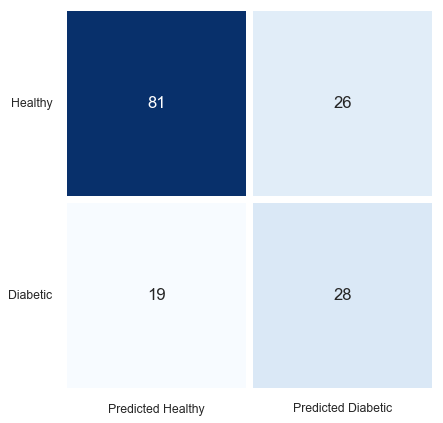

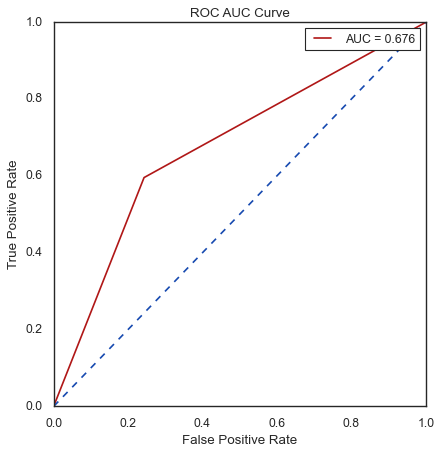

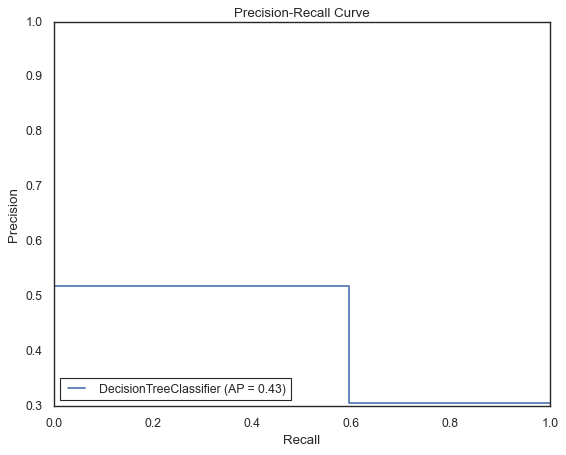

In [50]:
#Fitting DecisionTreeClassifier Model
classifier = DecisionTreeClassifier(criterion= 'gini', random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **Random Forest** <a id='9.7'></a>

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154

ROC AUC score: 0.8640882879300059
Accuracy Score:  0.8116883116883117


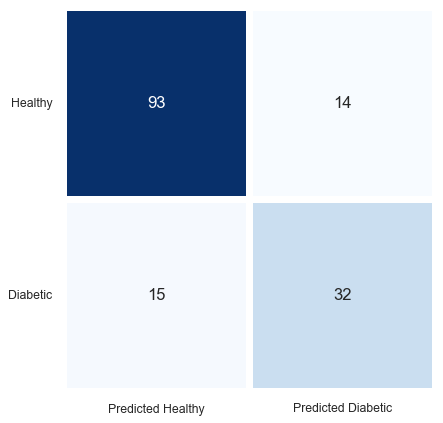

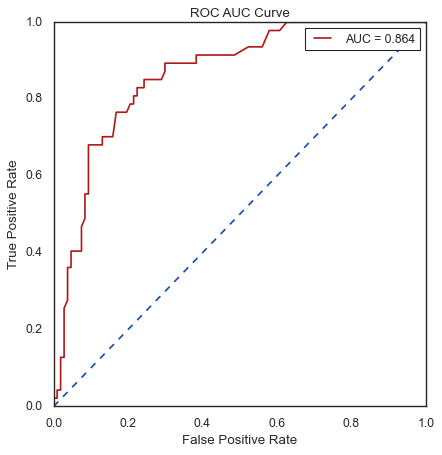

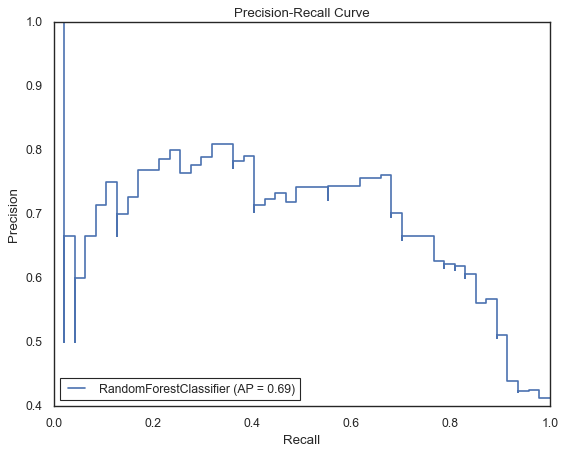

In [51]:
#Fitting RandomForestClassifier Model
classifier = RandomForestClassifier(criterion= 'entropy', n_estimators= 200, random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

In [52]:
pickle_out = open("Classifier.pkl", "wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

## **Extra Trees** <a id='9.8'></a>

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154

ROC AUC score: 0.8563332670511037
Accuracy Score:  0.7987012987012987


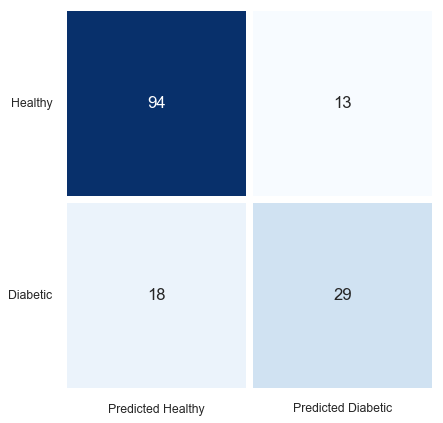

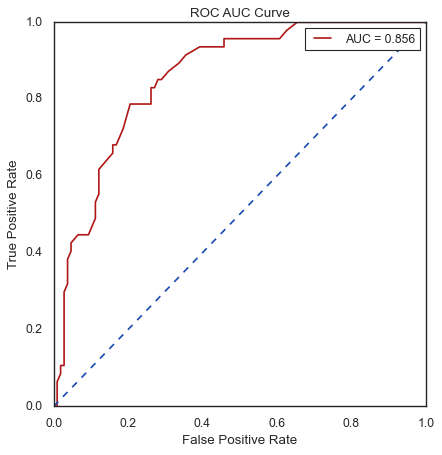

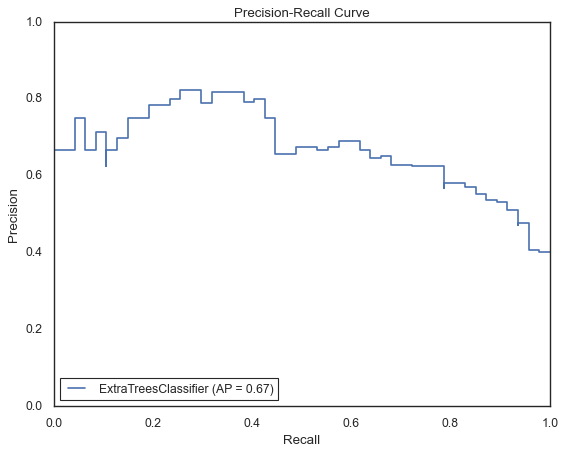

In [53]:
#Fitting ExtraTreesClassifier Model
classifier = ExtraTreesClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **AdaBoost** <a id='9.9'></a>

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       107
           1       0.61      0.47      0.53        47

    accuracy                           0.75       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.73      0.75      0.74       154

ROC AUC score: 0.8372439848876516
Accuracy Score:  0.7467532467532467


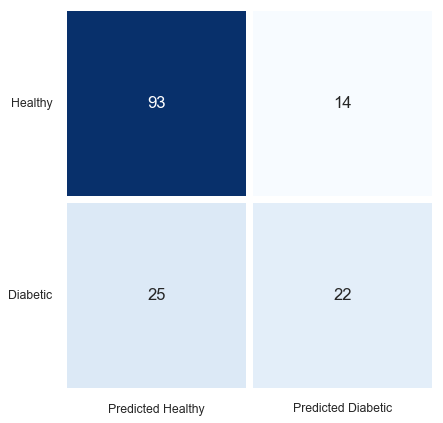

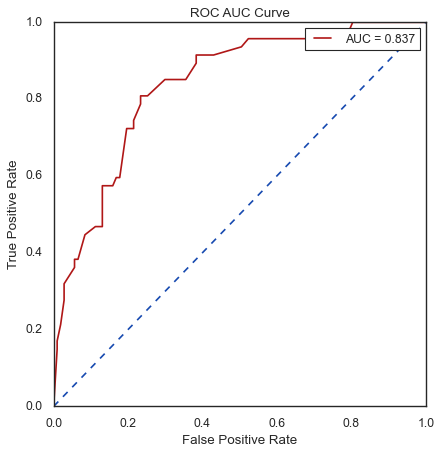

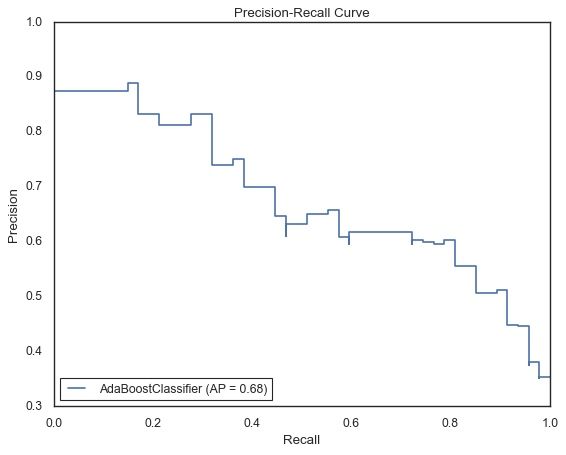

In [54]:
#Fitting AdaBoostClassifier Model
classifier = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 100, random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## **Gradient Boost** <a id='9.10'></a>

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       107
           1       0.67      0.66      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.80      0.80      0.80       154

ROC AUC score: 0.8283953072181348
Accuracy Score:  0.7987012987012987


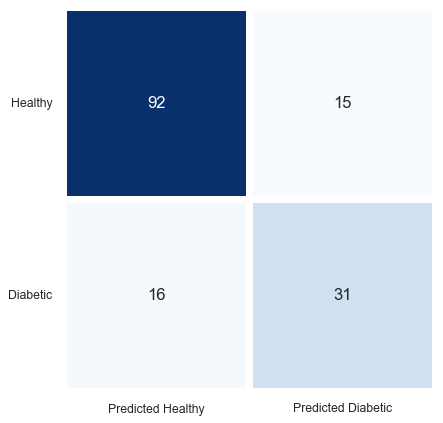

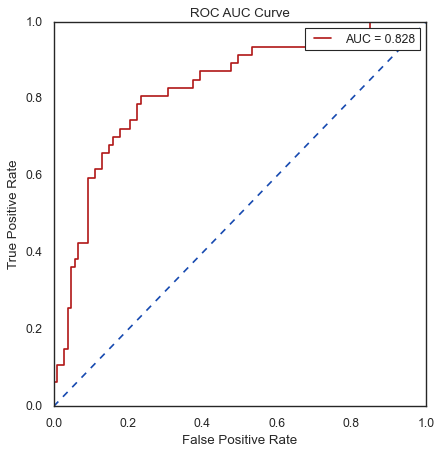

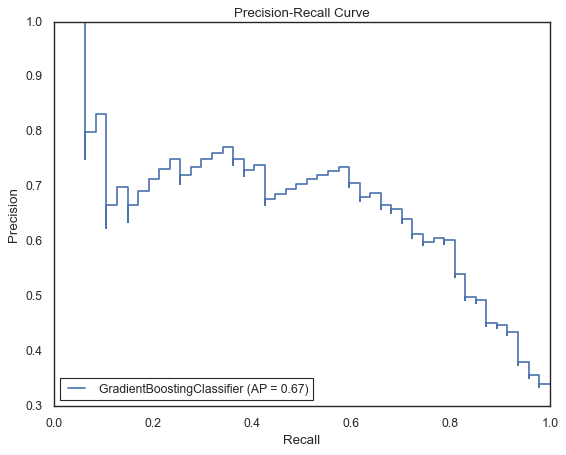

In [55]:
#Fitting GradientBoostingClassifier Model
classifier = GradientBoostingClassifier(criterion= 'mse', learning_rate= 0.1, loss= 'exponential', n_estimators= 100, random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

## Conclusion

📌 After extensive data analysis and I tried different classification models to see how it performs on the dataset. I got pretty good results with accuracy, roc, precision and recall score. <br>

📌 But, I didn't stop there, after that I tuned the hyperparamters with the help of Grid Search and saw the classification report with ROC AUC and Precision-Recall curve of different models. <br>

📌 With that, I came to conclusion that ***RandomForest***, ***ExtraTrees*** and ***SVC*** are models which are best fit for our dataset. <br>